In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import randint , uniform
import warnings
warnings.filterwarnings('ignore')

In [ ]:
labels = pd.read_csv('labels.csv')
data = pd.read_csv('data.csv')

print("Labels shape:", labels.shape)
print("Data shape:", data.shape)

Labels shape: (355, 2)
Data shape: (355, 1837)


In [21]:
print("Labels dosyasındaki sütunlar:")
print(labels.columns.tolist())

print("\nData dosyasındaki ilk 5 sütun:")
print(data.columns.tolist()[:5])

Labels dosyasındaki sütunlar:
['Sample', 'disease_type']

Data dosyasındaki ilk 5 sütun:
['Unnamed: 0', 'k__Viruses.f__Phycodnaviridae.g__Prasinovirus', 'k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus', 'k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus', 'k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus']


In [22]:
data = data.rename(columns={data.columns[0]: 'Sample'})

In [23]:
print("Labels dosyasındaki sütunlar:")
print(labels.columns.tolist())

print("\nData dosyasındaki ilk 5 sütun:")
print(data.columns.tolist()[:5])

Labels dosyasındaki sütunlar:
['Sample', 'disease_type']

Data dosyasındaki ilk 5 sütun:
['Sample', 'k__Viruses.f__Phycodnaviridae.g__Prasinovirus', 'k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus', 'k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus', 'k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus']


In [24]:
merged_data = pd.merge(labels, data, how='inner', on='Sample')

In [ ]:
X = merged_data.drop(['Sample', 'disease_type'], axis=1)
y = merged_data['disease_type']

In [26]:
print("Eksik değer kontrolü:")
print("X veri setindeki eksik değer toplamı:", X.isnull().sum().sum())
print("y veri setindeki eksik değer toplamı:", y.isnull().sum())

Eksik değer kontrolü:
X veri setindeki eksik değer toplamı: 0
y veri setindeki eksik değer toplamı: 0


In [ ]:
print("\nX veri setinin özet istatistikleri:")
display(X.describe())




X veri setinin özet istatistikleri:


,k__Viruses.f__Phycodnaviridae.g__Prasinovirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus,k__Viruses.f__Poxviridae.g__Parapoxvirus,k__Viruses.f__Papillomaviridae.g__Dyolambdapapillomavirus,k__Viruses.o__Mononegavirales.f__Bornaviridae.g__Bornavirus,k__Viruses.f__Bicaudaviridae.g__Bicaudavirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Aquamavirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Scutavirus,...,k__Bacteria.p__Synergistetes.c__Synergistia.o__Synergistales.f__Synergistaceae.g__Cloacibacillus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Sellimonas,k__Archaea.p__Thaumarchaeota.g__Candidatus_Nitrosotenuis,k__Bacteria.p__Rhodothermaeota.c__Balneolia.o__Balneolales.f__Balneolaceae.g__Gracilimonas,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Thermoproteales.f__Thermoproteaceae.g__Caldivirga,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermosphaera,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Deefgea,k__Bacteria.p__Deferribacteres.c__Deferribacteres.o__Deferribacterales.f__Deferribacteraceae.g__Geovibrio,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Subdoligranulum
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,3.200000,0.450704,112.963380,0.219718,1.273239,0.022535,0.157746,0.692958,2.095775,1.447887,...,0.008451,0.016901,0.016901,0.039437,0.019718,0.005634,0.002817,0.118310,0.005634,0.135211
std,4.630042,1.310418,108.475654,1.322194,2.573494,0.211396,0.734859,2.215465,2.848701,3.786605,...,0.091668,0.129084,0.129084,0.222009,0.139227,0.106149,0.053074,0.539489,0.074953,2.134933
min,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,132.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,8.000000,802.000000,16.000000,16.000000,2.000000,6.000000,20.000000,16.000000,32.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,6.000000,1.000000,40.000000


In [ ]:
print("\nHedef değişkenin (kanser türü) dağılımı:")
display(y.value_counts())
print("Yüzdesel dağılım:")
display(y.value_counts(normalize=True).mul(100).round(2))


Hedef değişkenin (kanser türü) dağılımı:


disease_type
prosrtate cancer    121
colon cancer        109
breast cancer       107
lung cancer          18
Name: count, dtype: int64

Yüzdesel dağılım:


disease_type
prosrtate cancer    34.08
colon cancer        30.70
breast cancer       30.14
lung cancer          5.07
Name: proportion, dtype: float64

In [ ]:
print("X veri setindeki değişkenlerin veri tipleri:")
display(X.dtypes.value_counts())


print("\nX veri setindeki her sütunun veri tipi:")
display(X.dtypes)

X veri setindeki değişkenlerin veri tipleri:


int64    1836
Name: count, dtype: int64


X veri setindeki her sütunun veri tipi:


k__Viruses.f__Phycodnaviridae.g__Prasinovirus                                                                          int64
k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus                                                         int64
k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus                                                           int64
k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus                                                              int64
k__Viruses.f__Poxviridae.g__Parapoxvirus                                                                               int64
                                                                                                                       ...  
k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella    int64
k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermosphaera                int64


In [ ]:
print("\nX veri setindeki değerlerin genel aralıkları:")
print(f"Minimum değer: {X.values.min()}")
print(f"Maksimum değer: {X.values.max()}")
print(f"Ortalama değer: {X.values.mean()}")


X veri setindeki değerlerin genel aralıkları:
Minimum değer: 0
Maksimum değer: 19382659
Ortalama değer: 3700.2689680567064


In [ ]:
row_sums = X.sum(axis=1)

X_normalized = X.div(row_sums, axis=0)

print("Normalizasyon Öncesi (ilk 5 sütun):")
display(X.iloc[0, :5])

print("\nİlk satırın toplamı:", X.iloc[0].sum())

print("\nNormalizasyon Sonrası (ilk 5 sütun):")
display(X_normalized.iloc[0, :5])

Normalizasyon Öncesi (ilk 5 sütun):


k__Viruses.f__Phycodnaviridae.g__Prasinovirus                      0
k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus     0
k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus      14
k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus          0
k__Viruses.f__Poxviridae.g__Parapoxvirus                           0
Name: 0, dtype: int64


İlk satırın toplamı: 1868181

Normalizasyon Sonrası (ilk 5 sütun):


k__Viruses.f__Phycodnaviridae.g__Prasinovirus                     0.000000
k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus    0.000000
k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus      0.000007
k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus         0.000000
k__Viruses.f__Poxviridae.g__Parapoxvirus                          0.000000
Name: 0, dtype: float64

In [ ]:
print("\nNormalleştirilmiş satırların toplamlarının kontrol edilmesi:")
row_sums_after = X_normalized.sum(axis=1)
print(row_sums_after.head())  

print("\nNormalleştirilmiş satır toplamlarının 1'den farkının maksimumu:", 
      (row_sums_after - 1).abs().max())


print("\nNormalleştirilmiş veri setinin istatistikleri:")
display(X_normalized.describe())


Normalleştirilmiş satırların toplamlarının kontrol edilmesi:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

Normalleştirilmiş satır toplamlarının 1'den farkının maksimumu: 8.881784197001252e-15

Normalleştirilmiş veri setinin istatistikleri:


,k__Viruses.f__Phycodnaviridae.g__Prasinovirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus,k__Viruses.f__Poxviridae.g__Parapoxvirus,k__Viruses.f__Papillomaviridae.g__Dyolambdapapillomavirus,k__Viruses.o__Mononegavirales.f__Bornaviridae.g__Bornavirus,k__Viruses.f__Bicaudaviridae.g__Bicaudavirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Aquamavirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Scutavirus,...,k__Bacteria.p__Synergistetes.c__Synergistia.o__Synergistales.f__Synergistaceae.g__Cloacibacillus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Sellimonas,k__Archaea.p__Thaumarchaeota.g__Candidatus_Nitrosotenuis,k__Bacteria.p__Rhodothermaeota.c__Balneolia.o__Balneolales.f__Balneolaceae.g__Gracilimonas,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Thermoproteales.f__Thermoproteaceae.g__Caldivirga,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermosphaera,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Deefgea,k__Bacteria.p__Deferribacteres.c__Deferribacteres.o__Deferribacterales.f__Deferribacteraceae.g__Geovibrio,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Subdoligranulum
count,3.550000e+02,3.550000e+02,355.000000,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,...,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02
mean,1.913478e-06,9.722724e-08,0.000050,1.998955e-08,2.225502e-07,1.539877e-09,1.331656e-08,1.309928e-07,1.198210e-06,1.851993e-07,...,3.779035e-09,1.612602e-08,6.837276e-09,8.706702e-09,1.963829e-09,2.687159e-10,1.325033e-09,2.367597e-08,3.083926e-09,1.920990e-08
std,4.306803e-06,4.730810e-07,0.000058,1.149912e-07,6.497144e-07,1.563902e-08,6.679606e-08,5.809437e-07,2.130817e-06,5.562856e-07,...,6.517613e-08,1.945723e-07,1.061077e-07,7.741666e-08,1.429782e-08,5.062995e-09,2.496554e-08,1.621125e-07,5.319586e-08,2.650106e-07
min,0.000000e+00,0.000000e+00,0.000001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000009,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.979441e-07,0.000000e+00,0.000028,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.315614e-07,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.020986e-06,0.000000e+00,0.000066,0.000000e+00,1.794910e-07,0.000000e+00,0.000000e+00,0.000000e+00,1.697179e-06,1.079191e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.432679e-05,4.636934e-06,0.000357,1.485615e-06,6.267264e-06,2.302718e-07,6.840076e-07,6.956171e-06,1.113964e-05,5.014187e-06,...,1.225555e-06,3.357181e-06,1.990949e-06,1.211204e-06,1.253906e-07,9.539414e-08,4.703868e-07,2.234208e-06,9.978626e-07,4.782495e-06


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (284, 1836)
Test seti boyutu: (71, 1836)


In [ ]:
cancer_types = y.unique()
print("Kanser türleri:", cancer_types)


Kanser türleri: ['colon cancer' 'lung cancer' 'breast cancer' 'prosrtate cancer']



colon cancer Kanseri - Binary Sınıflandırma
Sınıf dağılımı:
disease_type
0    246
1    109
Name: count, dtype: int64
Eğitim seti boyutu: (284, 1836)
Test seti boyutu: (71, 1836)

--- Random Forest ile Hiperparametre Optimizasyonu ---
En iyi Random Forest hiperparametreleri: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'entropy'}
En iyi cross-validation skoru: 0.9964912280701753

Random Forest Test Seti Performansı:
Duyarlılık (Sensitivity): 1.0000
Özgüllük (Specificity): 1.0000
Doğruluk (Accuracy): 1.0000
Confusion Matrix:
[[49  0]
 [ 0 22]]

--- LightGBM ile Hiperparametre Optimizasyonu ---
[LightGBM] [Info] Number of positive: 87, number of negative: 197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88335
[LightGBM] [Info] Number of data points in the train set: 2

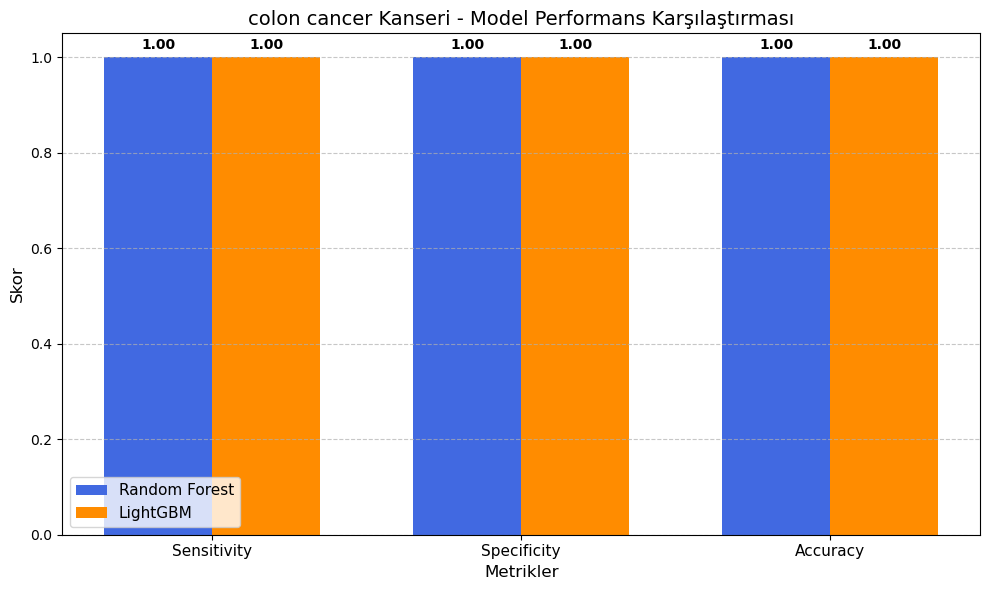


lung cancer Kanseri - Binary Sınıflandırma
Sınıf dağılımı:
disease_type
0    337
1     18
Name: count, dtype: int64
Eğitim seti boyutu: (284, 1836)
Test seti boyutu: (71, 1836)

--- Random Forest ile Hiperparametre Optimizasyonu ---
En iyi Random Forest hiperparametreleri: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 16, 'criterion': 'entropy'}
En iyi cross-validation skoru: 0.9894110275689222

Random Forest Test Seti Performansı:
Duyarlılık (Sensitivity): 0.7500
Özgüllük (Specificity): 1.0000
Doğruluk (Accuracy): 0.9859
Confusion Matrix:
[[67  0]
 [ 1  3]]

--- LightGBM ile Hiperparametre Optimizasyonu ---
[LightGBM] [Info] Number of positive: 14, number of negative: 270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86492
[LightGBM] [Info] Number of data points in the train set: 28

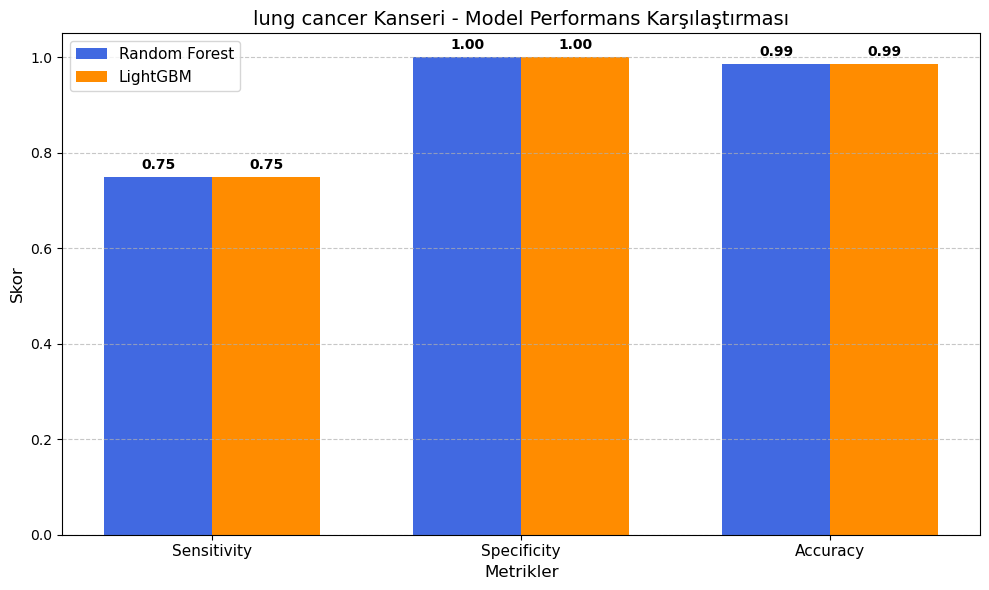


breast cancer Kanseri - Binary Sınıflandırma
Sınıf dağılımı:
disease_type
0    248
1    107
Name: count, dtype: int64
Eğitim seti boyutu: (284, 1836)
Test seti boyutu: (71, 1836)

--- Random Forest ile Hiperparametre Optimizasyonu ---
En iyi Random Forest hiperparametreleri: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 16, 'criterion': 'gini'}
En iyi cross-validation skoru: 0.975125313283208

Random Forest Test Seti Performansı:
Duyarlılık (Sensitivity): 0.9524
Özgüllük (Specificity): 1.0000
Doğruluk (Accuracy): 0.9859
Confusion Matrix:
[[50  0]
 [ 1 20]]

--- LightGBM ile Hiperparametre Optimizasyonu ---
[LightGBM] [Info] Number of positive: 86, number of negative: 198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89300
[LightGBM] [Info] Number of data points in the train set: 284, n

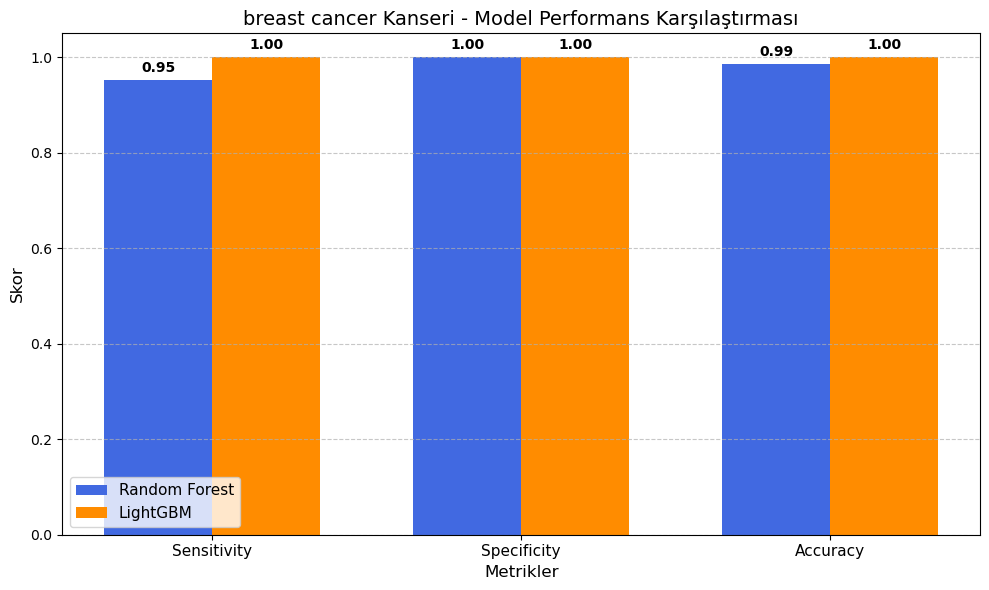


prosrtate cancer Kanseri - Binary Sınıflandırma
Sınıf dağılımı:
disease_type
0    234
1    121
Name: count, dtype: int64
Eğitim seti boyutu: (284, 1836)
Test seti boyutu: (71, 1836)

--- Random Forest ile Hiperparametre Optimizasyonu ---
En iyi Random Forest hiperparametreleri: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'criterion': 'entropy'}
En iyi cross-validation skoru: 0.9612781954887218

Random Forest Test Seti Performansı:
Duyarlılık (Sensitivity): 0.9167
Özgüllük (Specificity): 1.0000
Doğruluk (Accuracy): 0.9718
Confusion Matrix:
[[47  0]
 [ 2 22]]

--- LightGBM ile Hiperparametre Optimizasyonu ---
[LightGBM] [Info] Number of positive: 97, number of negative: 187
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87131
[LightGBM] [Info] Number of data points in the train set:

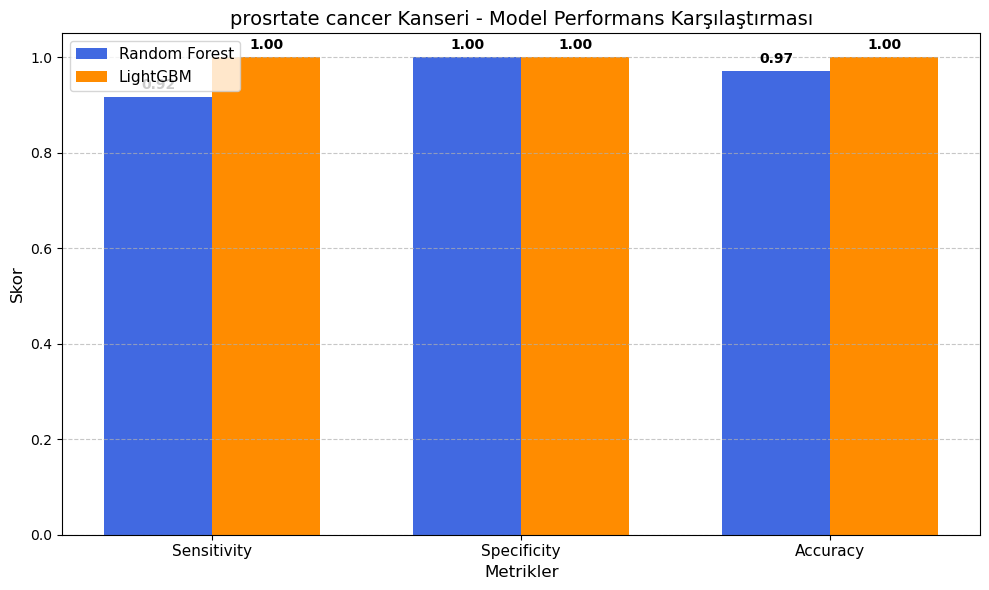

In [ ]:
all_results = []

for cancer_type in cancer_types:
    print(f"\n{'='*50}")
    print(f"{cancer_type} Kanseri - Binary Sınıflandırma")
    print(f"{'='*50}")
    
    y_binary = (y == cancer_type).astype(int)
    
    print("Sınıf dağılımı:")
    print(y_binary.value_counts())
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_normalized, y_binary, test_size=0.2, random_state=42, stratify=y_binary
    )
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    print(f"Eğitim seti boyutu: {X_train.shape}")
    print(f"Test seti boyutu: {X_test.shape}")
    

    print("\n--- Random Forest ile Hiperparametre Optimizasyonu ---")
    
    rf_param_dist = {
        'n_estimators': [100, 200, 400, 800],
        'max_depth': [2, 4, 8, 16, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'criterion': ['gini', 'entropy']
    }
    
    rf = RandomForestClassifier(random_state=42)
    
    # RandomizedSearchCV ile hiperparametre optimizasyonu
    rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=rf_param_dist,
        n_iter=20,  
        cv=cv,  
        random_state=42,
        n_jobs=-1, 
        scoring='accuracy'  
    )
    
    rf_random_search.fit(X_train, y_train)
    
    print("En iyi Random Forest hiperparametreleri:", rf_random_search.best_params_)
    print("En iyi cross-validation skoru:", rf_random_search.best_score_)
    
    rf_best = rf_random_search.best_estimator_
    
    # Test seti üzerinde değerlendirme
    y_pred_rf = rf_best.predict(X_test)
    
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()
    
    # Sensitivity = TP / (TP + FN)
    sensitivity_rf = tp / (tp + fn)
    
    # Specificity = TN / (TN + FP)
    specificity_rf = tn / (tn + fp)
    
    print("\nRandom Forest Test Seti Performansı:")
    print(f"Duyarlılık (Sensitivity): {sensitivity_rf:.4f}")
    print(f"Özgüllük (Specificity): {specificity_rf:.4f}")
    print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}")
    print("Confusion Matrix:")
    print(cm_rf)
    all_results.append({
        'Cancer Type': cancer_type,
        'Model': 'Random Forest',
        'Sensitivity': sensitivity_rf,
        'Specificity': specificity_rf,
        'Accuracy': accuracy_score(y_test, y_pred_rf)
    })
    
    print("\n--- LightGBM ile Hiperparametre Optimizasyonu ---")
    
    lgb_param_dist = {
         'n_estimators': randint(50, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'num_leaves': randint(15,128),
        'min_child_samples': randint(10, 40),
        'subsample': uniform(0.4, 0.6),  
        'colsample_bytree': uniform(0.4, 0.6), 
        'reg_alpha': uniform(0, 1.0),
        'reg_lambda': uniform(0, 1.0)
    }
    
    lgbm = lgb.LGBMClassifier(random_state=42)
    
    lgb_random_search = RandomizedSearchCV(
        estimator=lgbm,
        param_distributions=lgb_param_dist,
        n_iter=20, 
        cv=cv, 
        random_state=42,
        n_jobs=-1, 
        scoring='accuracy' 
    )
    
    lgb_random_search.fit(X_train, y_train)
    
    print("En iyi LightGBM hiperparametreleri:", lgb_random_search.best_params_)
    print("En iyi cross-validation skoru:", lgb_random_search.best_score_)
    
    lgb_best = lgb_random_search.best_estimator_
    
    y_pred_lgb = lgb_best.predict(X_test)
    
    # Confusion matrix
    cm_lgb = confusion_matrix(y_test, y_pred_lgb)
    tn, fp, fn, tp = cm_lgb.ravel()
    
    sensitivity_lgb = tp / (tp + fn)
    
    specificity_lgb = tn / (tn + fp)
    
    print("\nLightGBM Test Seti Performansı:")
    print(f"Duyarlılık (Sensitivity): {sensitivity_lgb:.4f}")
    print(f"Özgüllük (Specificity): {specificity_lgb:.4f}")
    print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred_lgb):.4f}")
    print("Confusion Matrix:")
    print(cm_lgb)

    all_results.append({
        'Cancer Type': cancer_type,
        'Model': 'LightGBM',
        'Sensitivity': sensitivity_lgb,
        'Specificity': specificity_lgb,
        'Accuracy': accuracy_score(y_test, y_pred_lgb)
    })
    
    plt.figure(figsize=(10, 6))
    
    metrics = ['Sensitivity', 'Specificity', 'Accuracy']
    rf_scores = [sensitivity_rf, specificity_rf, accuracy_score(y_test, y_pred_rf)]
    lgb_scores = [sensitivity_lgb, specificity_lgb, accuracy_score(y_test, y_pred_lgb)]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, rf_scores, width, label='Random Forest', color='royalblue')
    bars2 = plt.bar(x + width/2, lgb_scores, width, label='LightGBM', color='darkorange')

    plt.xlabel('Metrikler', fontsize=12)
    plt.ylabel('Skor', fontsize=12)
    plt.title(f'{cancer_type} Kanseri - Model Performans Karşılaştırması', fontsize=14)
    plt.xticks(x, metrics, fontsize=11)
    plt.ylim(0, 1.05) 
    plt.legend(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, bar in enumerate(bars1):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(bars2):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()



Tüm Sonuçlar:


,Cancer Type,Model,Sensitivity,Specificity,Accuracy
0,colon cancer,Random Forest,1.000000,1.0,1.000000
1,colon cancer,LightGBM,1.000000,1.0,1.000000
2,lung cancer,Random Forest,0.750000,1.0,0.985915
3,lung cancer,LightGBM,0.750000,1.0,0.985915
4,breast cancer,Random Forest,0.952381,1.0,0.985915
5,breast cancer,LightGBM,1.000000,1.0,1.000000
6,prosrtate cancer,Random Forest,0.916667,1.0,0.971831
7,prosrtate cancer,LightGBM,1.000000,1.0,1.000000


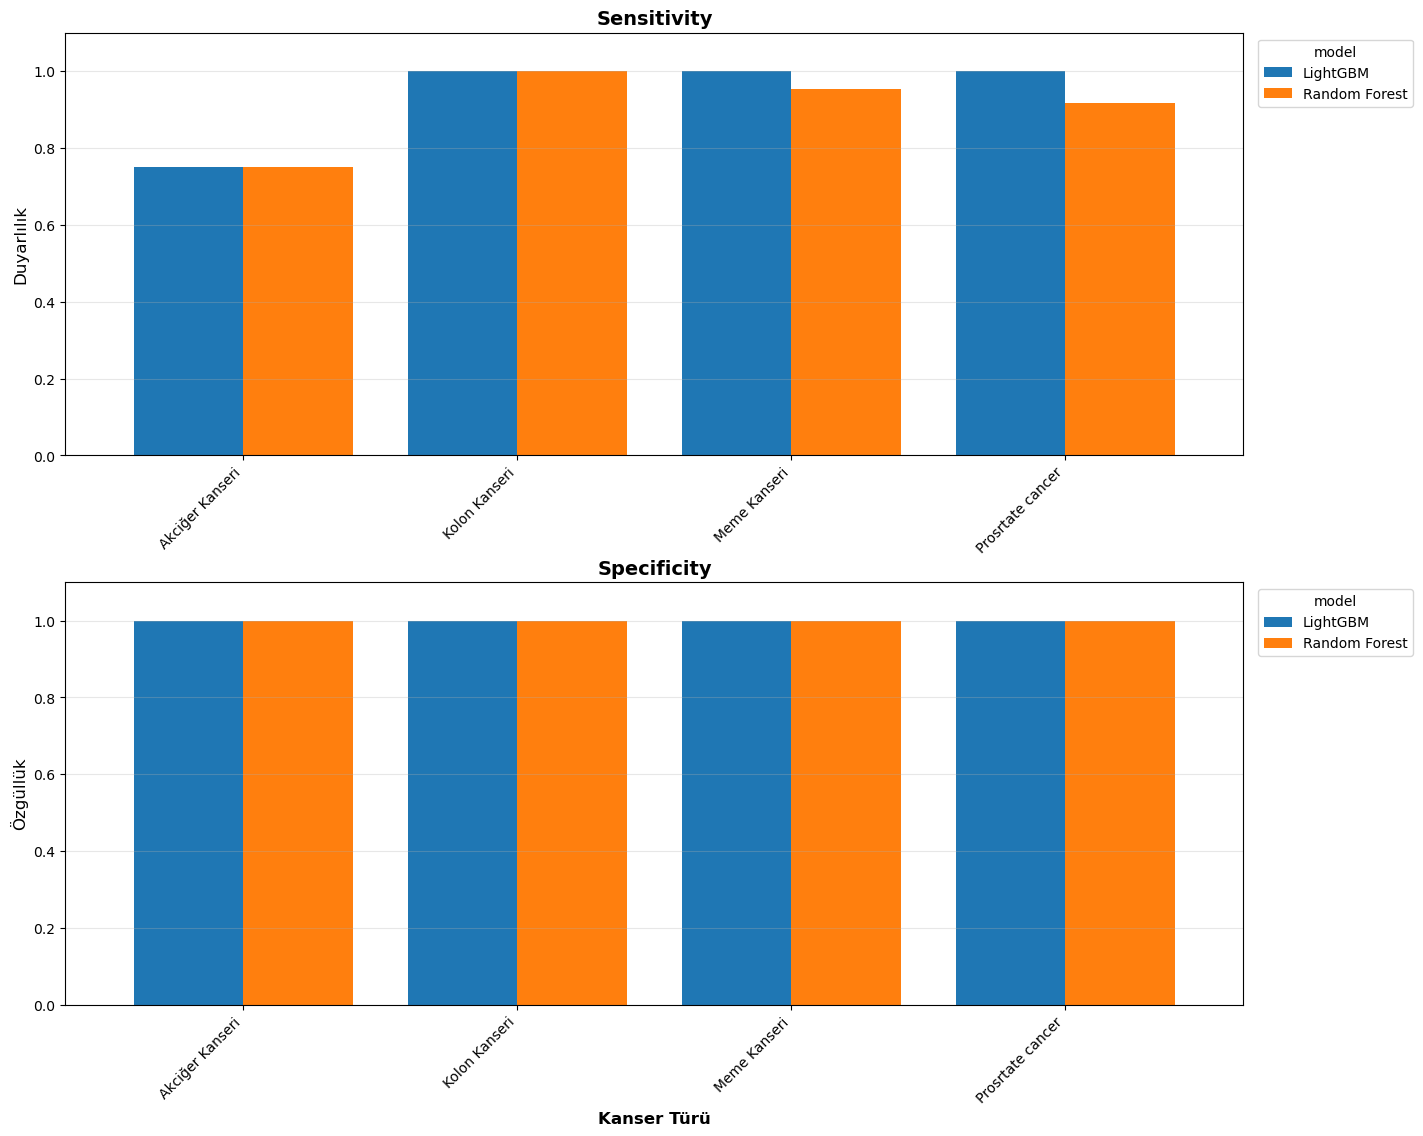

In [48]:
results_df = pd.DataFrame(all_results)
print("\nTüm Sonuçlar:")
display(results_df)

if 'Cancer Type' in results_df.columns:
   
    results_df['Cancer Type'] = results_df['Cancer Type'].str.capitalize()
    
    cancer_types_capitalized = {
        'breast cancer': 'Meme Kanseri',
        'colon cancer': 'Kolon Kanseri',
        'lung cancer': 'Akciğer Kanseri',
        'prostate cancer': 'Prostat Kanseri'
    }
    
    for old_name, new_name in cancer_types_capitalized.items():
        results_df['Cancer Type'] = results_df['Cancer Type'].str.replace(old_name, new_name, case=False)

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sensitivity_data = results_df.pivot(index='Cancer Type', columns='Model', values='Sensitivity')

ax = sensitivity_data.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('Sensitivity', fontsize=14, fontweight='bold')
plt.ylabel('Duyarlılık', fontsize=12)
plt.xlabel('')
plt.ylim(0, 1.1)  
plt.grid(axis='y', linestyle='-', alpha=0.3)  


plt.legend(title='model', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(2, 1, 2)
specificity_data = results_df.pivot(index='Cancer Type', columns='Model', values='Specificity')

ax = specificity_data.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('Specificity', fontsize=14, fontweight='bold')
plt.ylabel('Özgüllük', fontsize=12)
plt.xlabel('Kanser Türü', fontsize=12, fontweight='bold')
plt.ylim(0, 1.1) 
plt.grid(axis='y', linestyle='-', alpha=0.3)  

plt.legend(title='model', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout(pad=3.0)  
plt.subplots_adjust(right=0.85, hspace=0.3) 
plt.savefig('model_karsilastirma.png', dpi=300, bbox_inches='tight')
plt.show()